### Predicting Polycystic ovary syndrome (PCOS/PCOD) 
Dataset link: https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos?select=PCOS_data_without_infertility.xlsx

Before looking at the dataset and brainstorming ways to approach this problem, I would like to share my knowledge of PCOS. PCOS is a  common hormonal disorder occuring to women during the fertile years. Women with PCOS have irregular menstrual periods or sometimes an excess presence of androgen (male hormone) levels. PCOS can have complications that lead to infertility, Miscarriage or premature birth, Gestational diabetes or pregnancy-induced high blood pressure. This disorder also has other consequences like obesity, nausea, cystic acne, stress and anxiety.  

In this project, I try to predict PCOS based on other information like age, weight, BP, etc. 

In [63]:
#import packages here
#pip install imbalanced-learn
#pip install sweetviz
import pandas as pd
import numpy as np
import warnings
import openpyxl
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection  import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import StackingClassifier
import xgboost as xg
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

# don't show the dataframe warnings
warnings.filterwarnings("ignore")

### Data Collection

In [64]:
#importing the PCOS dataset here
pcos_dataset = pd.read_excel("data/PCOS_data_without_infertility.xlsx",sheet_name="Full_new")

In [65]:
pcos_dataset.head(10)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
5,6,6,0,36,74.1,165.0,27.217631,15,78,28,...,0.0,0,110,70,9,6,16.0,20.0,8.0,NaN
6,7,7,0,34,64.0,156.0,26.298488,11,72,18,...,0.0,0,120,80,6,6,15.0,16.0,6.8,NaN
7,8,8,0,33,58.5,159.0,23.139907,13,72,20,...,0.0,0,120,80,7,6,15.0,18.0,7.1,NaN
8,9,9,0,32,40.0,158.0,16.023073,11,72,18,...,0.0,0,120,80,5,7,17.0,17.0,4.2,NaN
9,10,10,0,36,52.0,150.0,23.111111,15,80,20,...,0.0,0,110,80,1,1,14.0,17.0,2.5,NaN


In [66]:
#We are also provided with an additonal dataset that examines the infertility data
inf_dataset = pd.read_csv("data/PCOS_infertility.csv")

In [67]:
inf_dataset.head(10)

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
5,6,10006,0,237.97,1.99,6.74
6,7,10007,0,1.99,1.99,3.05
7,8,10008,0,100.51,100.51,1.54
8,9,10009,0,1.99,1.99,1
9,10,10010,0,1.99,1.99,1.61


There is a disconnect between the infertility file and PCOS file in the "Patient File No." Column. In the below code block, I fix the "Patient File No." in PCOS dataset to match the one in infertility.

### Data Pre-processing

In [68]:
pcos_dataset["Patient File No."] = 10000 + pcos_dataset["Patient File No."].astype("int")
pcos_dataset.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [69]:
inf_dataset.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')

Now that the primary key - "Patient File No." is consistent across both the tables, we can merge the two datasets. The "AMH(ng/mL)" is present in both the files as the same, so we can ignore this one of the columns of the two datasets.

In [70]:
dataset = pcos_dataset.merge(inf_dataset[["Patient File No.","  I   beta-HCG(mIU/mL)","II    beta-HCG(mIU/mL)"]],on="Patient File No.",how = "left")

In [71]:
dataset.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,I beta-HCG(mIU/mL)_y,II beta-HCG(mIU/mL)_y
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,...,110,80,3,3,18.0,18.0,8.5,NaN,1.99,1.99
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,...,120,70,3,5,15.0,14.0,3.7,NaN,60.80,1.99
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,...,120,80,13,15,18.0,20.0,10.0,NaN,494.08,494.08
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,...,120,70,2,2,15.0,14.0,7.5,NaN,1.99,1.99
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,...,120,80,3,4,16.0,14.0,7.0,NaN,801.45,801.45


Let's identify if our dataset suffers from missing or NULL values.

In [72]:
print(pd.isnull(dataset).sum())

Sl. No                        0
Patient File No.              0
PCOS (Y/N)                    0
 Age (yrs)                    0
Weight (Kg)                   0
Height(Cm)                    0
BMI                           0
Blood Group                   0
Pulse rate(bpm)               0
RR (breaths/min)              0
Hb(g/dl)                      0
Cycle(R/I)                    0
Cycle length(days)            0
Marraige Status (Yrs)         1
Pregnant(Y/N)                 0
No. of aborptions             0
  I   beta-HCG(mIU/mL)_x      0
II    beta-HCG(mIU/mL)_x      0
FSH(mIU/mL)                   0
LH(mIU/mL)                    0
FSH/LH                        0
Hip(inch)                     0
Waist(inch)                   0
Waist:Hip Ratio               0
TSH (mIU/L)                   0
AMH(ng/mL)                    0
PRL(ng/mL)                    0
Vit D3 (ng/mL)                0
PRG(ng/mL)                    0
RBS(mg/dl)                    0
Weight gain(Y/N)              0
hair gro

The Unnamed:44 column seems to be just an excel additional column that can be ignored.

In [73]:
dataset.drop("Unnamed: 44",inplace = True,axis=1)

In [74]:
#Imputing the Nan valies in the Marraiage status dataset with median of the column.
median_marriage_years = dataset["Marraige Status (Yrs)"].median()
print("The median marriage years in the dataset is: ",median_marriage_years)
dataset["Marraige Status (Yrs)"].fillna(median_marriage_years,inplace=True)

The median marriage years in the dataset is:  7.0


In [75]:
#Replacing the NA values in the Fast Food column with 0
dataset["Fast food (Y/N)"].fillna(0,inplace=True)

In [76]:
dataset["AMH(ng/mL)"].unique()

array([2.07, 1.53, 6.63, 1.22, 2.26, 6.74, 3.05, 1.54, 1, 1.61, 4.47,
       1.67, 7.94, 2.38, 0.88, 0.69, 3.78, 1.92, 2.85, 2.13, 4.13, 2.5,
       1.89, 0.26, 3.84, 3.56, 1.56, 1.69, 2.34, 1.58, 2.36, 3.64, 2.78,
       0.33, 2.35, 3.88, 3.55, 4.33, 3.66, 4.5, 3.2, 2.1, 6.55, 1.2, 2.33,
       3.22, 2.333, 2.31, 4.2, 3.21, 2.14, 2.3, 4.6, 5.8, 5.2, 4.63, 1.01,
       2.58, 0.35, 5.23, 3.68, 2.55, 4.91, 1.03, 6.56, 3.91, 5.42, 1.65,
       2.06, 1.81, 3.81, 3.65, 8.98, 1.7, 3.18, 2.75, 0.86, 2.29, 2.19,
       8.46, 4.59, 1.04, 4.27, 3.86, 1.42, 10.07, 0.98, 4.07, 3.9, 10,
       16.9, 17, 21.9, 1.6, 3.3, 21, 12.7, 1.8, 3.6, 15, 5, 17.9, 19.8,
       9.2, 2.4, 5.14, 0.3, 11.48, 19.3, 8.8, 19, 4.3, 1.4, 12.6, 4.8,
       17.1, 11.6, 18.4, 9.9, 3.7, 2.9, 2, 4, 15.9, 7.51, 10.04, 6.86,
       7.02, 8.75, 5.27, 9, 3.41, 0.45, 2.53, 0.29, 2.6, 2.83, 2.01, 5.67,
       1.68, 3.63, 3.49, 8, 10.25, 32, 3.38, 1.35, 5.78, 4.66, 1.99, 1.28,
       3.99, 5.69, 7.81, 6.41, 5.76, 6.65, 4.15, 1.86, 

The "AMH(ng/mL)_y" columns has a value of "a" instead of a numerical value, but there is just a single row with this issue, so we can neglect this. 

In [77]:
print(dataset[dataset["AMH(ng/mL)"] == 'a'])
dataset.loc[305, "AMH(ng/mL)"] = 0

     Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
305     306             10306           0          37         56.0   

     Height(Cm)         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
305        152.0  24.238227           13                74                20   

     ...  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  BP _Diastolic (mmHg)  \
305  ...                  1                  120                    70   

     Follicle No. (L)  Follicle No. (R)  Avg. F size (L) (mm)  \
305                 4                 5                  17.0   

     Avg. F size (R) (mm) Endometrium (mm)    I   beta-HCG(mIU/mL)_y  \
305                  16.0              5.6                      42.0   

     II    beta-HCG(mIU/mL)_y  
305                      1.99  

[1 rows x 46 columns]


Just cleaning up some rows with incorrect values instead of a numerical value, hence replacing it and converting the columns into a numerical column.

In [78]:
dataset['II    beta-HCG(mIU/mL)_x'] = dataset['II    beta-HCG(mIU/mL)_x'].replace("1.99.",0)

In [79]:
dataset['II    beta-HCG(mIU/mL)_x'] = pd.to_numeric(dataset['II    beta-HCG(mIU/mL)_x'], errors='coerce')
dataset['AMH(ng/mL)_x'] = dataset['AMH(ng/mL)'].astype("float")

In [80]:
dataset.isna().any()

Sl. No                      False
Patient File No.            False
PCOS (Y/N)                  False
 Age (yrs)                  False
Weight (Kg)                 False
Height(Cm)                  False
BMI                         False
Blood Group                 False
Pulse rate(bpm)             False
RR (breaths/min)            False
Hb(g/dl)                    False
Cycle(R/I)                  False
Cycle length(days)          False
Marraige Status (Yrs)       False
Pregnant(Y/N)               False
No. of aborptions           False
  I   beta-HCG(mIU/mL)_x    False
II    beta-HCG(mIU/mL)_x    False
FSH(mIU/mL)                 False
LH(mIU/mL)                  False
FSH/LH                      False
Hip(inch)                   False
Waist(inch)                 False
Waist:Hip Ratio             False
TSH (mIU/L)                 False
AMH(ng/mL)                  False
PRL(ng/mL)                  False
Vit D3 (ng/mL)              False
PRG(ng/mL)                  False
RBS(mg/dl)    

### Data Visualization

In [81]:
#using the sweetviz library to create a comprehensive analysis of the dataset
report = sv.analyze(dataset,target_feat='PCOS (Y/N)')

# Show the report
report.show_html('PCOS_report.html',
            open_browser=True, 
            layout='widescreen', 
            scale=None) 

                                             |          | [  0%]   00:00 -> (? left)

Report PCOS_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


You can refer to the very insightful and wholesome analytics of the entire dataset in the .html file created. I found the following insights:  
- Out of the total 541 patients studied, around only 33%(177) had been diagnosed with PCOS. 
- There are several strong correlations within the dataset's dependent variables.
- The co-dependent varaiables are:
    - Weight and BMI
    - Follicle No. (L)	Follicle No. (R) with the target variable

In [82]:
corr_data_fig = dataset.corr()
# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=corr_data_fig.values,
                   x=corr_data_fig.columns,
                   y=corr_data_fig.columns,
                   colorscale='Viridis',  # You can choose other color scales
                   colorbar=dict(title='Correlation')
                ))

# Customize the layout (optional)
fig.update_layout(
    title='Correlation Heatmap',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    width=1500,  # Set the width of the heatmap
    height=1000  # Set the height of the heatmap
)

fig.show()

In [83]:
#let us create our training dataset now
X=dataset.drop(["PCOS (Y/N)"],axis = 1)
X=X.drop(["Sl. No"],axis = 1)
X=X.drop(["Patient File No."],axis = 1)
y=dataset["PCOS (Y/N)"]

Scaling the independent variables using MinMaxScaling

In [84]:
mm_scaler = MinMaxScaler()
cols = X.columns
x_scaled = mm_scaler.fit_transform(X)
X_scaled = pd.DataFrame(x_scaled, columns = cols)
X_scaled

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),I beta-HCG(mIU/mL)_y,II beta-HCG(mIU/mL)_y,AMH(ng/mL)_x
0,0.285714,0.176623,0.348837,0.259878,0.571429,0.942029,0.500000,0.314286,0.000000,0.416667,...,0.765625,0.782609,0.136364,0.15,0.750000,0.750000,0.472222,0.000021,0.000075,0.031364
1,0.571429,0.441558,0.569767,0.472141,0.571429,0.884058,0.333333,0.507937,0.000000,0.416667,...,0.843750,0.673913,0.136364,0.25,0.625000,0.583333,0.205556,0.001833,0.000075,0.023182
2,0.464286,0.490909,0.651163,0.485347,0.000000,0.855072,0.166667,0.523810,0.000000,0.416667,...,0.843750,0.782609,0.590909,0.75,0.750000,0.833333,0.555556,0.015181,0.019759,0.100455
3,0.607143,0.441558,0.255814,0.651650,0.285714,0.855072,0.333333,0.555556,0.000000,0.416667,...,0.843750,0.673913,0.090909,0.10,0.625000,0.583333,0.416667,0.000021,0.000075,0.018485
4,0.178571,0.272727,0.558140,0.288613,0.000000,0.855072,0.166667,0.238095,0.000000,0.416667,...,0.843750,0.782609,0.136364,0.20,0.666667,0.583333,0.388889,0.024651,0.032054,0.034242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0.535714,0.246753,0.641674,0.229669,0.857143,0.855072,0.000000,0.396825,0.000000,0.416667,...,0.765625,0.673913,0.045455,0.00,0.729167,0.416667,0.372222,0.000021,0.000075,0.025758
537,0.357143,0.418182,0.488372,0.486446,0.571429,0.855072,0.166667,0.365079,0.000000,0.416667,...,0.765625,0.673913,0.409091,0.35,0.791667,0.750000,0.455556,0.002429,0.000075,0.084848
538,0.571429,0.298701,0.348837,0.414699,0.285714,0.884058,0.333333,0.365079,0.000000,0.500000,...,0.765625,0.782609,0.045455,0.00,0.750000,0.375000,0.405556,0.000021,0.000075,0.056061
539,0.250000,0.246753,0.302326,0.369386,0.571429,0.884058,0.333333,0.555556,0.666667,0.166667,...,0.765625,0.673913,0.318182,0.30,0.750000,0.666667,0.638889,0.008984,0.000075,0.078788


### Model Training

In [85]:
y.value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

Since in data viz we found that the output variable is heavily undersampled for the positive PCOS value. We can resample the data to ensure that we can have a balanced distribution of the dataset.

In [86]:

# Create a RandomOverSampler object
oversampler = RandomOverSampler(sampling_strategy="auto", random_state=42) 

# Fit and apply oversampling to the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_scaled, y)


In [87]:
y_train_resampled.value_counts()

PCOS (Y/N)
0    364
1    364
Name: count, dtype: int64

The output sample is balanced now and we can apply the classifiers onto this dataset.

In [88]:
#Splitting the newly scaled and sampled dataset into training and testing data
X_train,X_test, y_train, y_test = train_test_split(X_train_resampled , y_train_resampled, test_size=0.2,shuffle=True)

Since there are around 40+ input variables to be accounted for, I used the RFE method to determine which variables can be utilized for the classifier. After several iterations, I found out that the approriate number of variables for RFE can be between anywhere between 14 and 18 to get the highest accuracy as shown above.

In [89]:
rfc_model = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=10)
num_features_to_select = 16 
rfe = RFE(estimator=rfc_model, n_features_to_select=num_features_to_select)

# Fit the RFE model on the training data
rfe.fit(X_train, y_train )

# Get the selected features and their rankings
selected_features = X_train.columns[rfe.support_]
feature_rankings = rfe.ranking_

# Train a model on the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [90]:
#Applying the Logistic Regression models with different regularisation to get a good fit
logistic_model_l1 = LogisticRegression(solver="liblinear",penalty="l1",C=1.0,random_state=73).fit(X_train_selected,y_train)
logistic_model_l2 = LogisticRegression(penalty="l2",C=1.0,random_state=73).fit(X_train_selected,y_train)
logistic_model_en = LogisticRegression(solver="saga",l1_ratio=0.2,penalty="elasticnet",C=1.0,random_state=73).fit(X_train_selected,y_train)

y_pred_lr_l1 = logistic_model_l1.predict(X_test_selected) 
cross_val_scores = cross_val_score(logistic_model_l1, X_train_selected, y_train, cv=5, scoring='accuracy')
print("The 5-fold CV scores :", cross_val_scores)
print("Accuracy using Logistic Regression on test data: ",accuracy_score(y_test,y_pred_lr_l1))
print("-----------------")

y_pred_lr_l2 = logistic_model_l2.predict(X_test_selected) 
cross_val_scores = cross_val_score(logistic_model_l2, X_train_selected, y_train, cv=5, scoring='accuracy')
print("The 5-fold CV scores :", cross_val_scores)
print("Accuracy using Logistic Regression on test data: ",accuracy_score(y_test,y_pred_lr_l2))
print("-----------------")

y_pred_lr_en = logistic_model_en.predict(X_test_selected) 
cross_val_scores = cross_val_score(logistic_model_en, X_train_selected, y_train, cv=5, scoring='accuracy')
print("The 5-fold CV scores :", cross_val_scores)
print("Accuracy using Logistic Regression on test data: ",accuracy_score(y_test,y_pred_lr_en))
print("-----------------")

The 5-fold CV scores : [0.90598291 0.91452991 0.92241379 0.9137931  0.9137931 ]
Accuracy using Logistic Regression on test data:  0.8904109589041096
-----------------
The 5-fold CV scores : [0.90598291 0.86324786 0.92241379 0.9137931  0.88793103]
Accuracy using Logistic Regression on test data:  0.863013698630137
-----------------
The 5-fold CV scores : [0.91452991 0.87179487 0.92241379 0.9137931  0.9137931 ]
Accuracy using Logistic Regression on test data:  0.8767123287671232
-----------------


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Accuracy Score using best model on test data: 0.9315068493150684
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        76
           1       0.91      0.96      0.93        70

    accuracy                           0.93       146
   macro avg       0.93      0.93      0.93       146
weighted avg       0.93      0.93      0.93       146



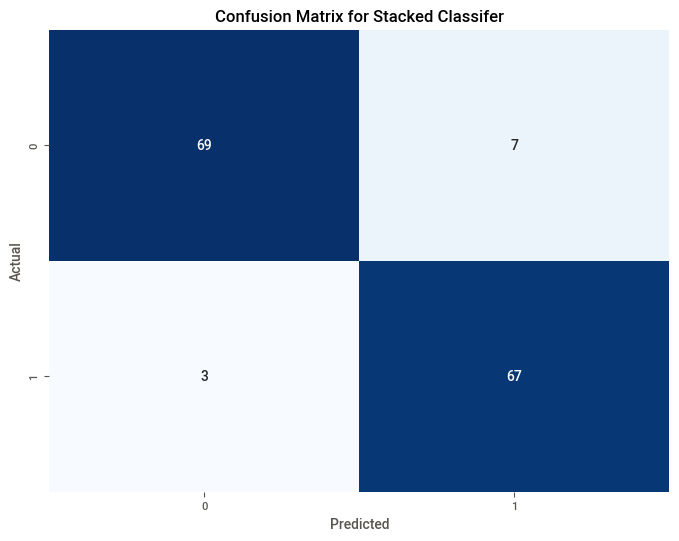

In [91]:

#Hyperparameter tuning on the input dataset and on XGBoost using 5-Fold CV
xg_model = xg.XGBClassifier(objective="binary:logistic")

param_grid = {
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "max_depth": [3, 4, 5, 6, 7],
    "min_child_weight": [1, 2, 3, 4],
    "subsample": [0.6, 0.7, 0.8, 0.9],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9],
    "n_estimators": [100, 200, 300]
}

random_search = RandomizedSearchCV(
    estimator=xg_model,
    param_distributions=param_grid,
    scoring="accuracy",  
    cv=5,  # Number of cross-validation folds
    n_iter=50,  # Number of random combinations to try
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

random_search.fit(X_train_selected, y_train)

best_xgb_model = random_search.best_estimator_
y_pred_xg = best_xgb_model.predict(X_test_selected)

# Evaluate the model using an appropriate metric
auc_score_xg = accuracy_score(y_test, y_pred_xg)
#print("The best XGBoost params are: ",best_xgb_model)
print("Accuracy Score using best model on test data:", auc_score_xg)

classi_report_xg = classification_report(y_test, y_pred_xg)
print(classi_report_xg)

cm_xg = confusion_matrix(y_test, y_pred_xg)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Stacked Classifer")
plt.show()

Text(0.5, 0, 'Xgboost Feature Importance')

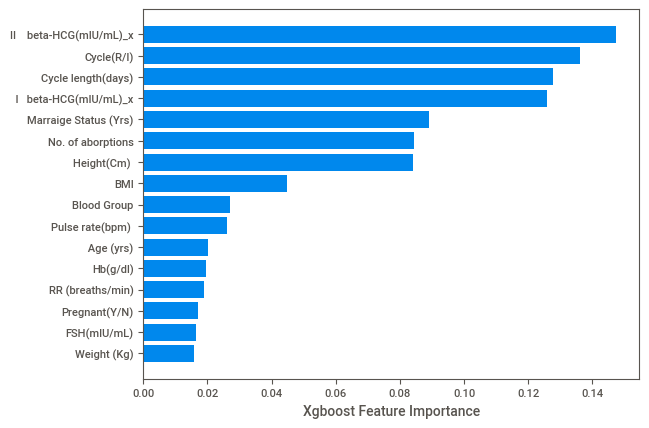

In [99]:
sorted_idx = best_xgb_model.feature_importances_.argsort()
plt.barh(X_train_resampled.columns[sorted_idx], best_xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [92]:
#training the Random Forect Classifer on the training data and then performing 5-Fold CV 
rfc_model = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=10) #creates a Random forest model
rfc_model.fit(X_train_selected, y_train) #trains model on data

pred_rfc = rfc_model.predict(X_test_selected) #prediction
accuracy_rfc = accuracy_score(y_test, pred_rfc)

score = cross_val_score(rfc_model,X_train_selected,y_train,cv = 5,scoring = 'accuracy')
print("The accuracy scores for the 5-folds:",score)
print("The accuracy scores for the test data:",accuracy_rfc)
classi_report_rf = classification_report(y_test, pred_rfc)
print(classi_report_rf)

The accuracy scores for the 5-folds: [0.90598291 0.94871795 0.9137931  0.9137931  0.88793103]
The accuracy scores for the test data: 0.8904109589041096
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        76
           1       0.86      0.93      0.89        70

    accuracy                           0.89       146
   macro avg       0.89      0.89      0.89       146
weighted avg       0.89      0.89      0.89       146



In [93]:
#Figuring out the right parameters and applying using CV on SVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [ 0.1, 1,'scale', 'auto'],
}

svm_classifier = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svc, cv=5, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

y_pred = best_svm_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy on test data:", accuracy)


classi_report = classification_report(y_test, y_pred)
print(classi_report)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy on test data: 0.9041095890410958
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        76
           1       0.89      0.91      0.90        70

    accuracy                           0.90       146
   macro avg       0.90      0.90      0.90       146
weighted avg       0.90      0.90      0.90       146



Accuracy on the test data: 0.9246575342465754
Accuracy on the 5-fold CV [0.90598291 0.94871795 0.92241379 0.94827586 0.94827586]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        76
           1       0.89      0.96      0.92        70

    accuracy                           0.92       146
   macro avg       0.93      0.93      0.92       146
weighted avg       0.93      0.92      0.92       146



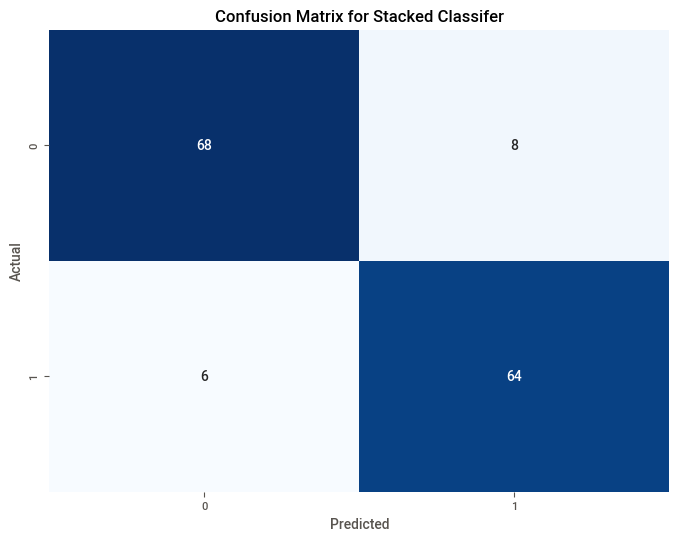

In [94]:
#performing stack ensembling on xgboost and random forest
base_models = [
    ('svm', SVC(kernel='linear', C=1.0, random_state=42)),
    ('xgb_model', xg.XGBClassifier(random_state=42))
]


stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42,n_estimators=150,max_features='sqrt',min_samples_leaf=10))
stacking_classifier.fit(X_train_selected, y_train)
y_pred_sc = stacking_classifier.predict(X_test_selected)
print("Accuracy on the test data:", accuracy_score(y_test, y_pred_sc))

#stack_model = StackingClassifier(final_estimator="xgb",estimators = 2)
score = cross_val_score(stacking_classifier,X_train_selected,y_train,cv = 5,scoring = 'accuracy')
print("Accuracy on the 5-fold CV",score)

classi_report_sc = classification_report(y_test, y_pred_sc)
print(classi_report_sc)

cm_sc = confusion_matrix(y_test, y_pred)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Stacked Classifer")
plt.show()

### Conclusion:  
 The XGBoost and the Stacked Classifiers gave the best results on the dataset with less than 20 cases of wrong classifications. But based on the overall CV and testing acccuracy alongside the confusion matrix, we can decide that the XGBoost model performs better than the Stacked classifier and can be used for determining PCOS given the input data.